In [44]:
#libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
from IPython.display import display, HTML
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import tree
from sklearn.model_selection import train_test_split
import seaborn as sns

In [45]:
#import attrition data files into new dataframe

hr_attrition_data = pd.read_csv('HR Attrition Data.csv')

hr_attrition_data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,38,Yes,Travel_Rarely,1180,Research & Development,29,1,Medical,1,282,...,2,80,0,17,2,1,1,0,0,0
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,28,Yes,Non-Travel,1366,Research & Development,24,2,Technical Degree,1,1082,...,1,80,0,10,2,1,10,7,1,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [68]:
# Using value_counts() method
attrition_value_counts = hr_attrition_data['Attrition'].value_counts()
print(attrition_value_counts)

No     1233
Yes     237
Name: Attrition, dtype: int64


In [46]:
# Select the relevant columns for training the decision tree
features = hr_attrition_data[['JobInvolvement', 'JobSatisfaction', 'TrainingTimesLastYear']]
labels = hr_attrition_data['Attrition']

In [47]:
print(features.shape)
print(len('Attrition'))

(1470, 3)
9


In [48]:
# Split the data into training and testing sets
X_train, X_test = train_test_split(features, test_size=0.2, random_state=42)

In [49]:
# Create a decision tree classifier
decision_tree = tree.DecisionTreeClassifier()

In [50]:
# Calculate descriptive statistics of the training set
training_stats = X_train.describe()
print(training_stats)

       JobInvolvement  JobSatisfaction  TrainingTimesLastYear
count     1176.000000      1176.000000            1176.000000
mean         2.721939         2.547619               2.804422
std          0.714634         1.157890               1.287259
min          1.000000         1.000000               0.000000
25%          2.000000         1.000000               2.000000
50%          3.000000         3.000000               3.000000
75%          3.000000         4.000000               3.000000
max          4.000000         4.000000               6.000000


In [51]:
# Calculate the correlation matrix of the training set
correlation_matrix = X_train.corr()
print(correlation_matrix)


                       JobInvolvement  JobSatisfaction  TrainingTimesLastYear
JobInvolvement               1.000000         0.016530               0.000968
JobSatisfaction              0.016530         1.000000               0.030235
TrainingTimesLastYear        0.000968         0.030235               1.000000


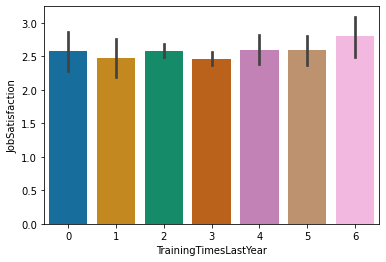

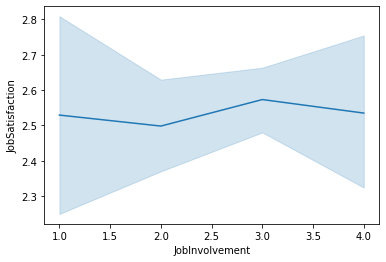

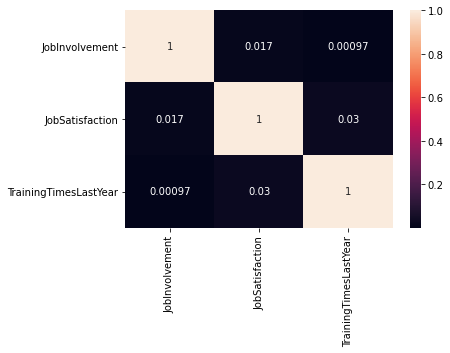

In [67]:
# Visualize the distribution of training hours
# Bar plot
sns.barplot(x='TrainingTimesLastYear', y='JobSatisfaction', data=hr_attrition_data, palette ='colorblind')
plt.show()


# Create a line graph of job involvement vs. job satisfaction
sns.lineplot(x='JobInvolvement', y='JobSatisfaction', data=X_train)
plt.show()

# Set the color palette to 'cubehelix'
sns.set_palette('cubehelix')

# Create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True)
plt.show()

In [99]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report


X = hr_attrition_data[['JobInvolvement', 'JobSatisfaction', 'TrainingTimesLastYear']]
y = hr_attrition_data['Attrition']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [100]:
# Instantiate and fit the decision tree on the training data
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [101]:
# Evaluate the initial accuracy on the validation set
y_pred_val = tree.predict(X_val)
initial_accuracy = accuracy_score(y_val, y_pred_val)

In [102]:
# Perform post-pruning
path = tree.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [103]:
# Iterate over different ccp_alpha values and prune the tree
trees = []
for ccp_alpha in ccp_alphas:
    pruned_tree = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    pruned_tree.fit(X_train, y_train)
    trees.append(pruned_tree)

In [104]:
# Evaluate the accuracies of pruned trees on the validation set
accuracies = []
for pruned_tree in trees:
    y_pred_val = pruned_tree.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred_val)
    accuracies.append(accuracy)

In [105]:
# Find the best ccp_alpha value with the highest accuracy
best_ccp_alpha = ccp_alphas[accuracies.index(max(accuracies))]

In [106]:
# Build the final pruned tree using the best ccp_alpha value
final_pruned_tree = DecisionTreeClassifier(random_state=42, ccp_alpha=best_ccp_alpha)
final_pruned_tree.fit(X, y) 

DecisionTreeClassifier(ccp_alpha=0.0009423682893070643, random_state=42)

In [107]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [108]:
# Create and train the decision tree classifier
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [109]:
# Make predictions on the test set
y_pred = tree.predict(X_test)

In [110]:
# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.86


In [111]:
# Generate a classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

          No       0.91      0.93      0.92       255
         Yes       0.45      0.38      0.42        39

    accuracy                           0.86       294
   macro avg       0.68      0.66      0.67       294
weighted avg       0.85      0.86      0.85       294



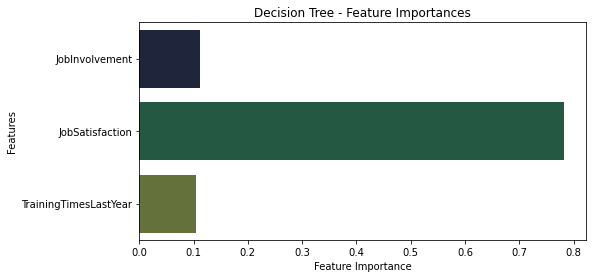

In [112]:
# Visualize the feature importances
importance = tree.feature_importances_
plt.figure(figsize=(8, 4))
sns.barplot(x=importance, y=X.columns)
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Decision Tree - Feature Importances")
plt.show()

In [114]:
# Describe the decision tree rules
rules = []
for feature, threshold in zip(X.columns, tree.tree_.threshold):
    if threshold != -2:  # Internal node
        rule = f"If {feature} <= {threshold:.2f},"
    else:  # Leaf node
        rule = "Leaf node"
    rules.append(rule)
    print(rule)

If JobInvolvement <= 1.50,
If JobSatisfaction <= 1.50,
If TrainingTimesLastYear <= 5.50,


# Logistic regression model

In [116]:
import pandas as pd
import statsmodels.api as sm


In [123]:
# Select the relevant features and target
X = hr_attrition_data[['JobSatisfaction', 'JobInvolvement', 'TrainingTimesLastYear']]
# Convert Attrition to binary values (0 for "No", 1 for "Yes")
y = hr_attrition_data['Attrition'].map({'No': 0, 'Yes': 1})

In [124]:
# Add constant to X
X = sm.add_constant(X)

In [125]:
# Create and train the logistic regression model
logit_model = sm.Logit(y, X)
result = logit_model.fit()

# Print the summary of the logistic regression model
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.315212
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:              Attrition   No. Observations:                 1470
Model:                          Logit   Df Residuals:                     1466
Method:                           MLE   Df Model:                            3
Date:                Sun, 18 Jun 2023   Pseudo R-squ.:                  0.2864
Time:                        23:13:40   Log-Likelihood:                -463.36
converged:                       True   LL-Null:                       -649.29
Covariance Type:            nonrobust   LLR p-value:                 2.755e-80
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     3.2152      0.419      7.681      0.000       2.395       4.

In [128]:
import statsmodels.api as sm

# Fit the logistic regression model (assuming you have already fitted the model)
logit_model = sm.Logit(y, X)
result = logit_model.fit()

# Perform Wald tests for each coefficient
wald_tests = result.wald_test_terms()

# Get the test results summary
summary_frame = wald_tests.summary_frame()

# Print the results of the Wald tests
print(summary_frame)


Optimization terminated successfully.
         Current function value: 0.315212
         Iterations 8
                             chi2        P>chi2  df constraint
const                   59.000037  1.576690e-14              1
JobSatisfaction        194.500131  3.312138e-44              1
JobInvolvement          25.058984  5.560308e-07              1
TrainingTimesLastYear    5.298809  2.134002e-02              1
